In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('large_repr', 'truncate')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [35]:
%pwd

'/Users/yg/code/github/data-challenges/breast-detection/notebooks'

# Define paths

In [36]:
DATA_PATH = Path("../data/")
DOCUMENTATION_PATH = Path("../documentation")

# Read diagnostic file and prepare some date columns

In [37]:
diag_data = pd.read_csv(DATA_PATH / "DIAG.txt", sep="|")
diag_data.drop(["FLEXIBLE_FLD_1_CHAR", "FLEXIBLE_FLD_2_CHAR"], axis=1, inplace=True)
diag_data['SERVICE_DATE'] = pd.to_datetime(diag_data["SERVICE_DATE"])
diag_data['YEAR']=diag_data['SERVICE_DATE'].apply(lambda x: x.year)
diag_data['MONTH']=diag_data['SERVICE_DATE'].apply(lambda x: x.month)
diag_data['DAYS']=diag_data['SERVICE_DATE'].apply(lambda x: x.day)
print('Number of rows:',len(diag_data))
diag_data.head()

Number of rows: 3192462


,PATIENT_ID,CLAIM_ID,CLAIM_TYP_CD,SERVICE_DATE,MONTH_ID,DIAGNOSIS_CODE,DIAG_VERS_TYP_ID,DIAG_CD_POSN_NBR,PROVIDER_ID,RESTATE_FLAG,YEAR,MONTH,DAYS
0,999944505,10458194885000421223,P,2019-12-12,201912,C50.111,2,1,7976755,0,2019,12,12
1,999944505,10458181473000479341,P,2019-09-10,201909,C50.111,2,1,7976755,0,2019,9,10
2,999944505,10458165065000341912,P,2019-05-20,201905,C50.111,2,1,7976755,0,2019,5,20
3,999944505,10458161262800585500,P,2019-05-20,201905,C50.111,2,1,8117971,0,2019,5,20
4,999944505,10458157449200367497,P,2019-02-21,201902,C50.111,2,1,7976755,0,2019,2,21


In [38]:
diag_data.columns

Index(['PATIENT_ID', 'CLAIM_ID', 'CLAIM_TYP_CD', 'SERVICE_DATE', 'MONTH_ID',
       'DIAGNOSIS_CODE', 'DIAG_VERS_TYP_ID', 'DIAG_CD_POSN_NBR', 'PROVIDER_ID',
       'RESTATE_FLAG', 'YEAR', 'MONTH', 'DAYS'],
      dtype='object')

In [39]:
diag_data.dtypes

PATIENT_ID                   int64
CLAIM_ID                    uint64
CLAIM_TYP_CD                object
SERVICE_DATE        datetime64[ns]
MONTH_ID                     int64
DIAGNOSIS_CODE              object
DIAG_VERS_TYP_ID             int64
DIAG_CD_POSN_NBR             int64
PROVIDER_ID                  int64
RESTATE_FLAG                 int64
YEAR                         int64
MONTH                        int64
DAYS                         int64
dtype: object

In [40]:
# diag_data = diag_data.sort_values('SERVICE_DATE').drop_duplicates('PATIENT_ID',keep='last')
# len(diag_data)

In [41]:
diag_data['DIAGNOSIS_CODE'].value_counts()

C50.919    352621
C50.412    221682
C79.51     220857
C50.911    213397
C50.411    209627
            ...  
D46.B           1
171.8           1
C84.11          1
C81.01          1
209.52          1
Name: DIAGNOSIS_CODE, Length: 1471, dtype: int64

In [42]:
diag_data['DIAG_CD_POSN_NBR'].value_counts()

1     1725787
2      768251
3      368921
4      190154
5       61828
6       35353
7       23438
8       15982
9        2123
10        291
11        201
12        133
Name: DIAG_CD_POSN_NBR, dtype: int64

In [43]:
diag_data['DIAG_VERS_TYP_ID'].value_counts()

2    2875419
1     317043
Name: DIAG_VERS_TYP_ID, dtype: int64

In [44]:
diag_data['CLAIM_TYP_CD'].value_counts()

P    2081284
I    1111178
Name: CLAIM_TYP_CD, dtype: int64

In [45]:
pd.set_option('large_repr', 'truncate')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [46]:
diag_data.describe()

,PATIENT_ID,CLAIM_ID,MONTH_ID,DIAG_VERS_TYP_ID,DIAG_CD_POSN_NBR,PROVIDER_ID,RESTATE_FLAG,YEAR,MONTH,DAYS
count,3192462.000,3192462.000,3192462.000,3192462.000,3192462.000,3192462.000,3192462.000,3192462.000,3192462.000,3192462.000
mean,789207034.679,9236930833484746752.000,201762.999,1.901,1.870,7920107.990,0.000,2017.563,6.671,15.594
std,489095596.960,3431678232460020224.000,146.615,0.299,1.281,3858483.473,0.000,1.469,3.421,8.783
min,29388541.000,105574109005.000,201309.000,1.000,1.000,0.000,0.000,2013.000,1.000,1.000
25%,350093098.000,10364138572207513600.000,201705.000,2.000,1.000,7174647.000,0.000,2017.000,4.000,8.000
50%,739649624.000,10490105592210327552.000,201806.000,2.000,1.000,7820004.000,0.000,2018.000,7.000,15.000
75%,1188288727.000,10649087704100038656.000,201903.000,2.000,2.000,8890977.000,0.000,2019.000,10.000,23.000
max,1734677597.000,10832209596600500224.000,201912.000,2.000,12.000,25004074.000,0.000,2019.000,12.000,31.000


# Some plots related to DIAG features

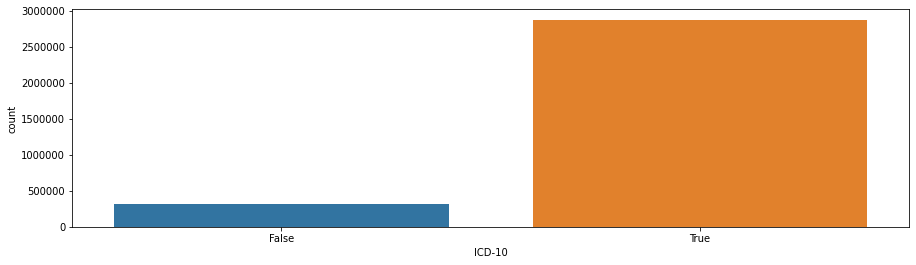

In [47]:
# Let's replace the DIAG_VERS_TYP_ID by a boolean (True is ICD-10)
diag_data['ICD-10'] = True
diag_data['ICD-10'][diag_data['DIAG_VERS_TYP_ID']==1]=False
plt.figure(figsize=(15,4))
plt.ticklabel_format(style='plain', axis='y')
sns.countplot(diag_data['ICD-10'])
plt.show()
plt.close()

In [48]:
diag_data.drop(["ICD-10"], axis=1, inplace=True)

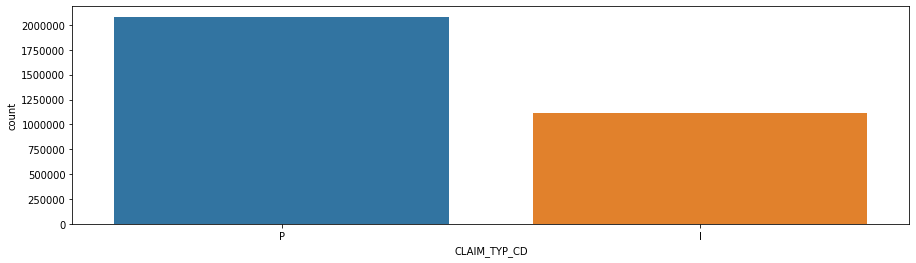

In [49]:
plt.figure(figsize=(15,4))
plt.ticklabel_format(style='plain', axis='y')
sns.countplot(diag_data['CLAIM_TYP_CD'])
plt.show()
plt.close()

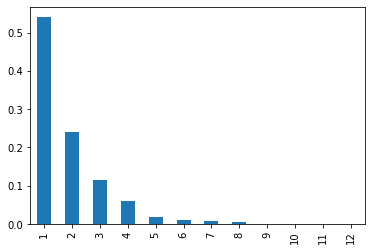

In [50]:
(diag_data['DIAG_CD_POSN_NBR'].value_counts()/ len(diag_data)).plot.bar()
plt.show()
plt.close()

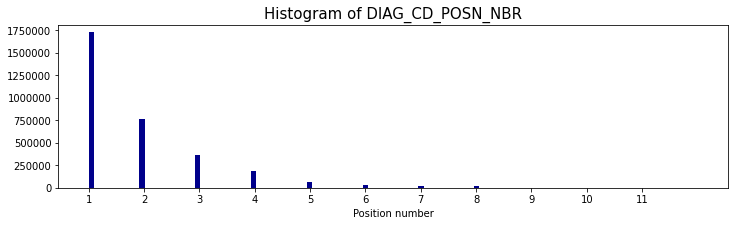

In [51]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.ticklabel_format(style='plain', axis='y')
ax.set_xticks(np.arange(12))
ax.hist(diag_data['DIAG_CD_POSN_NBR'], bins=120, color='darkblue')
ax.set_title('Histogram of DIAG_CD_POSN_NBR', fontsize=15)
ax.set_xlabel('Position number')
plt.show()
plt.close()

# Read BC_SN ICD Code file

In [52]:
bcsnicdcode = pd.read_excel(DOCUMENTATION_PATH / "BC_SN ICD Code.xlsx")
bcsnicdcode['diagnosis_code'] = bcsnicdcode['diagnosis_code'].astype('str')
bcsnicdcode.columns = bcsnicdcode.columns.str.upper()
bcsnicdcode.head()

,DIAGNOSIS_CODE,INDICATION_CD,VERSION,SUB_INDICATION_CD
0,174,BC,ICD_9,NaN
1,174.0,BC,ICD_9,NaN
2,174.1,BC,ICD_9,NaN
3,174.2,BC,ICD_9,NaN
4,174.3,BC,ICD_9,NaN


In [53]:
bcsnicdcode.dtypes

DIAGNOSIS_CODE       object
INDICATION_CD        object
VERSION              object
SUB_INDICATION_CD    object
dtype: object

In [54]:
dataset = pd.merge(diag_data, bcsnicdcode, how='left', on=["DIAGNOSIS_CODE"])
new_column_order = ['PATIENT_ID', 'CLAIM_ID', 'CLAIM_TYP_CD', 'SERVICE_DATE', 'MONTH_ID',
                            'YEAR', 'MONTH', 'DAYS', 'DIAGNOSIS_CODE', 'DIAG_VERS_TYP_ID', 
                            'DIAG_CD_POSN_NBR', 'PROVIDER_ID','RESTATE_FLAG', 
                            'INDICATION_CD', 'VERSION', 'SUB_INDICATION_CD']
del diag_data
dataset = dataset[new_column_order]
dataset.head()

,PATIENT_ID,CLAIM_ID,CLAIM_TYP_CD,SERVICE_DATE,MONTH_ID,YEAR,MONTH,DAYS,DIAGNOSIS_CODE,DIAG_VERS_TYP_ID,DIAG_CD_POSN_NBR,PROVIDER_ID,RESTATE_FLAG,INDICATION_CD,VERSION,SUB_INDICATION_CD
0,999944505,10458194885000421223,P,2019-12-12,201912,2019,12,12,C50.111,2,1,7976755,0,BC,ICD_10,NaN
1,999944505,10458181473000479341,P,2019-09-10,201909,2019,9,10,C50.111,2,1,7976755,0,BC,ICD_10,NaN
2,999944505,10458165065000341912,P,2019-05-20,201905,2019,5,20,C50.111,2,1,7976755,0,BC,ICD_10,NaN
3,999944505,10458161262800585500,P,2019-05-20,201905,2019,5,20,C50.111,2,1,8117971,0,BC,ICD_10,NaN
4,999944505,10458157449200367497,P,2019-02-21,201902,2019,2,21,C50.111,2,1,7976755,0,BC,ICD_10,NaN


In [60]:
#joined_diag_code[joined_diag_code['INDICATION_CD'].isnull()]
dataset[dataset["PATIENT_ID"]== 302800216].sort_values("SERVICE_DATE")

,PATIENT_ID,CLAIM_ID,CLAIM_TYP_CD,SERVICE_DATE,MONTH_ID,YEAR,MONTH,DAYS,DIAGNOSIS_CODE,DIAG_VERS_TYP_ID,DIAG_CD_POSN_NBR,PROVIDER_ID,RESTATE_FLAG,INDICATION_CD,VERSION,SUB_INDICATION_CD
1654149,302800216,10193170087900177575,P,2019-07-17,201907,2019,7,17,C50.912,2,2,7049291,0,BC,ICD_10,NaN
1654148,302800216,10193170087900177575,P,2019-07-17,201907,2019,7,17,C77.9,2,1,7049291,0,SN,ICD_10,META_STATIC
1654142,302800216,10364170509411296962,P,2019-07-25,201907,2019,7,25,C50.512,2,1,7969220,0,BC,ICD_10,NaN
1654139,302800216,10458169632500025156,P,2019-08-01,201908,2019,8,1,C50.512,2,1,7969220,0,BC,ICD_10,NaN
1654140,302800216,10420171174507372846,P,2019-08-02,201908,2019,8,2,C50.919,2,4,9231771,0,BC,ICD_10,NaN
1654146,302800216,10241170785101031589,P,2019-08-06,201908,2019,8,6,C50.912,2,1,10992768,0,BC,ICD_10,NaN
1654145,302800216,10241170785101108797,P,2019-08-06,201908,2019,8,6,C50.912,2,1,7079881,0,BC,ICD_10,NaN
1654141,302800216,10420169667305785407,P,2019-08-06,201908,2019,8,6,C50.912,2,1,17844307,0,BC,ICD_10,NaN
1654138,302800216,10458170395700000467,P,2019-08-08,201908,2019,8,8,C50.512,2,1,7773767,0,BC,ICD_10,NaN
1654137,302800216,10458170395700000467,P,2019-08-08,201908,2019,8,8,Z51.11,2,2,7773767,0,NaN,NaN,NaN


In [23]:
def create_date_column(df: pd.DataFrame, indication_code: str, date_column_name: str) -> pd.DataFrame:
    """ 
        DESCRIPTION:
        Based on DIAG claims data, use diagnose_code  with indication_cd=indication_code to identify the patients 
        who diagnosed as indication_code.
        Choose the earliest service_date as indication_code diagnosed date (date_column_name), 
        define the patient as indication_code patient
        INPUTS:
            - df: the dataset
            - indicate_code: indication code to match for
            - date_column_name: new date column to create in the dataframe following the logic described in description.
    """
    df['DateRank'] = df.groupby('PATIENT_ID')['SERVICE_DATE'].rank(method='dense', ascending=True)
    df.sort_values("DateRank", inplace=True)
    cond = ((df['DateRank'] == 1.0) & (df["INDICATION_CD"] == indication_code))
    xdf = df[cond]
    #xdf.drop_duplicates(inplace=True)
    xdf.rename(columns={"SERVICE_DATE": date_column_name}, inplace=True)
    xdf.drop(["DateRank"], axis=1, inplace=True)
    major_columns =['PATIENT_ID',
     'CLAIM_ID',
     'CLAIM_TYP_CD',
     date_column_name,
     'DIAGNOSIS_CODE',
     'DIAG_VERS_TYP_ID',
     'DIAG_CD_POSN_NBR',
     'PROVIDER_ID',
      'INDICATION_CD']
    xdf= xdf[major_columns]
    join_columns =['PATIENT_ID',
     'CLAIM_ID',
     'CLAIM_TYP_CD',
     'DIAGNOSIS_CODE',
     'DIAG_VERS_TYP_ID',
     'DIAG_CD_POSN_NBR',
     'PROVIDER_ID']
    xdf = pd.merge(df, xdf, how='outer', on=join_columns)
    xdf.rename(columns={"INDICATION_CD_x": "INDICATION_CD"}, inplace=True)
    xdf.sort_values("SERVICE_DATE", inplace=True)
    xdf[date_column_name] = xdf.groupby(['PATIENT_ID'])[date_column_name].ffill()
    patient_type = indication_code + "_PATIENT"
    xdf[patient_type] = False
    xdf.loc[xdf[date_column_name].notnull(), patient_type] = True
    xdf.drop(["INDICATION_CD_y", "DateRank"], axis=1, inplace=True)   
    return xdf

In [24]:
dataset = create_date_column(dataset, "BC", "BC_DIAG_DATE")
dataset = create_date_column(dataset, "SN", "SN_DIAG_DATE")

In [25]:
dataset[dataset["BC_DIAG_DATE"].notnull()]

,PATIENT_ID,CLAIM_ID,CLAIM_TYP_CD,SERVICE_DATE,MONTH_ID,YEAR,MONTH,DAYS,DIAGNOSIS_CODE,DIAG_VERS_TYP_ID,DIAG_CD_POSN_NBR,PROVIDER_ID,RESTATE_FLAG,INDICATION_CD,VERSION,SUB_INDICATION_CD,BC_DIAG_DATE,BC_PATIENT,SN_DIAG_DATE,SN_PATIENT
0,682263770,106322319723,P,2013-09-01,201309,2013,9,1,174.9,1,1,18045009,0,BC,ICD_9,NaN,2013-09-01,True,NaT,False
37661,682263770,106322319723,P,2013-09-01,201309,2013,9,1,183.8,1,2,0,0,NaN,NaN,NaN,2013-09-01,True,NaT,False
37671,984348418,121392292155,I,2013-09-01,201309,2013,9,1,174.9,1,2,7650633,0,BC,ICD_9,NaN,2013-09-01,True,NaT,False
37680,31819076,121185697488,I,2013-09-01,201309,2013,9,1,196.9,1,6,0,0,SN,ICD_9,META_STATIC,2013-09-01,True,2013-09-01,True
36807,964070710,106386337470,P,2013-09-01,201309,2013,9,1,174.9,1,1,0,0,BC,ICD_9,NaN,2013-09-01,True,NaT,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638177,1438847320,10420186784600672796,I,2019-12-31,201912,2019,12,31,C79.51,2,2,19385112,0,SN,ICD_10,META_STATIC,2017-10-28,True,NaT,False
2279055,1124076690,10808190830900159938,I,2019-12-31,201912,2019,12,31,C50.912,2,1,7923889,0,BC,ICD_10,NaN,2018-12-13,True,NaT,False
2638337,561348424,10490185856308112112,P,2019-12-31,201912,2019,12,31,C50.912,2,1,7196476,0,BC,ICD_10,NaN,2013-09-03,True,NaT,False
1068001,741832861,10458185832500400642,P,2019-12-31,201912,2019,12,31,C50.412,2,1,12309957,0,BC,ICD_10,NaN,2019-09-18,True,2019-09-18,True


In [26]:
dataset[dataset["PATIENT_ID"]== 999944505].sort_values("SERVICE_DATE")

,PATIENT_ID,CLAIM_ID,CLAIM_TYP_CD,SERVICE_DATE,MONTH_ID,YEAR,MONTH,DAYS,DIAGNOSIS_CODE,DIAG_VERS_TYP_ID,DIAG_CD_POSN_NBR,PROVIDER_ID,RESTATE_FLAG,INDICATION_CD,VERSION,SUB_INDICATION_CD,BC_DIAG_DATE,BC_PATIENT,SN_DIAG_DATE,SN_PATIENT
8427,999944505,10420104286602251984,P,2017-10-05,201710,2017,10,5,C50.919,2,2,0,0,BC,ICD_10,NaN,2017-10-05,True,NaT,False
8428,999944505,10420104286602251984,P,2017-10-05,201710,2017,10,5,C50.111,2,1,0,0,BC,ICD_10,NaN,2017-10-05,True,NaT,False
58769,999944505,10458104547800230731,P,2017-10-27,201710,2017,10,27,C50.111,2,1,8117971,0,BC,ICD_10,NaN,2017-10-05,True,NaT,False
91562,999944505,10458105418500104369,P,2017-11-09,201711,2017,11,9,C50.111,2,1,8117971,0,BC,ICD_10,NaN,2017-10-05,True,NaT,False
91499,999944505,10458105418500104369,P,2017-11-09,201711,2017,11,9,Z51.11,2,3,8117971,0,NaN,NaN,NaN,2017-10-05,True,NaT,False
133541,999944505,10458106665300111006,P,2017-11-30,201711,2017,11,30,C50.111,2,1,8117971,0,BC,ICD_10,NaN,2017-10-05,True,NaT,False
133551,999944505,10458106665300111006,P,2017-11-30,201711,2017,11,30,Z51.11,2,4,8117971,0,NaN,NaN,NaN,2017-10-05,True,NaT,False
157836,999944505,10458107963200098082,P,2017-12-20,201712,2017,12,20,C50.111,2,1,7039165,0,BC,ICD_10,NaN,2017-10-05,True,NaT,False
157489,999944505,10458107963200098094,P,2017-12-20,201712,2017,12,20,C50.111,2,1,7039165,0,BC,ICD_10,NaN,2017-10-05,True,NaT,False
157513,999944505,10458107963200098082,P,2017-12-20,201712,2017,12,20,Z51.11,2,4,7039165,0,NaN,NaN,NaN,2017-10-05,True,NaT,False


In [27]:
dataset[dataset.INDICATION_CD == "SN"]

,PATIENT_ID,CLAIM_ID,CLAIM_TYP_CD,SERVICE_DATE,MONTH_ID,YEAR,MONTH,DAYS,DIAGNOSIS_CODE,DIAG_VERS_TYP_ID,DIAG_CD_POSN_NBR,PROVIDER_ID,RESTATE_FLAG,INDICATION_CD,VERSION,SUB_INDICATION_CD,BC_DIAG_DATE,BC_PATIENT,SN_DIAG_DATE,SN_PATIENT
37680,31819076,121185697488,I,2013-09-01,201309,2013,9,1,196.9,1,6,0,0,SN,ICD_9,META_STATIC,2013-09-01,True,2013-09-01,True
37796,31819076,121185697488,I,2013-09-01,201309,2013,9,1,198.5,1,5,0,0,SN,ICD_9,META_STATIC,2013-09-01,True,2013-09-01,True
35760,297261014,105915180520,P,2013-09-03,201309,2013,9,3,196.3,1,2,7059210,0,SN,ICD_9,META_STATIC,NaT,False,2013-09-03,True
110373,1009586172,106456155930,P,2013-09-03,201309,2013,9,3,198.5,1,1,7091790,0,SN,ICD_9,META_STATIC,NaT,False,NaT,False
35308,572120246,106372924266,P,2013-09-03,201309,2013,9,3,196.3,1,2,7238868,0,SN,ICD_9,META_STATIC,NaT,False,2013-09-03,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638124,1438847320,10490194532408960758,P,2019-12-31,201912,2019,12,31,C78.00,2,2,8147360,0,SN,ICD_10,META_STATIC,2017-10-28,True,NaT,False
2638130,1438847320,10420188437100685013,I,2019-12-31,201912,2019,12,31,C79.51,2,2,19385112,0,SN,ICD_10,META_STATIC,2017-10-28,True,NaT,False
2638141,1438847320,10420188437100685013,I,2019-12-31,201912,2019,12,31,C78.02,2,1,19385112,0,SN,ICD_10,META_STATIC,2017-10-28,True,NaT,False
2638176,1438847320,10420186784600672796,I,2019-12-31,201912,2019,12,31,C78.02,2,1,19385112,0,SN,ICD_10,META_STATIC,2017-10-28,True,NaT,False


In [28]:
dataset.dtypes

PATIENT_ID                    int64
CLAIM_ID                     uint64
CLAIM_TYP_CD                 object
SERVICE_DATE         datetime64[ns]
MONTH_ID                      int64
YEAR                          int64
MONTH                         int64
DAYS                          int64
DIAGNOSIS_CODE               object
DIAG_VERS_TYP_ID              int64
DIAG_CD_POSN_NBR              int64
PROVIDER_ID                   int64
RESTATE_FLAG                  int64
INDICATION_CD                object
VERSION                      object
SUB_INDICATION_CD            object
BC_DIAG_DATE         datetime64[ns]
BC_PATIENT                     bool
SN_DIAG_DATE         datetime64[ns]
SN_PATIENT                     bool
dtype: object

In [29]:
def generate_mbc_column(df: pd.DataFrame) -> pd.DataFrame:
    df["DAY_DIFF"] = df["SN_DIAG_DATE"] - df["BC_DIAG_DATE"]
    df["DAY_DIFF"] = df["DAY_DIFF"].dt.days
    df["mBC_PATIENT"] = False
    df.loc[dataset["DAY_DIFF"] >=-30, "mBC_PATIENT"] = True
    df.drop(["DAY_DIFF"], axis=1, inplace=True)   
    return df

In [30]:
dataset = generate_mbc_column(dataset)
dataset.reset_index(inplace=True)

In [31]:
dataset.head()

,index,PATIENT_ID,CLAIM_ID,CLAIM_TYP_CD,SERVICE_DATE,MONTH_ID,YEAR,MONTH,DAYS,DIAGNOSIS_CODE,...,PROVIDER_ID,RESTATE_FLAG,INDICATION_CD,VERSION,SUB_INDICATION_CD,BC_DIAG_DATE,BC_PATIENT,SN_DIAG_DATE,SN_PATIENT,mBC_PATIENT
0,0,682263770,106322319723,P,2013-09-01,201309,2013,9,1,174.9,...,18045009,0,BC,ICD_9,NaN,2013-09-01,True,NaT,False,False
1,37661,682263770,106322319723,P,2013-09-01,201309,2013,9,1,183.8,...,0,0,NaN,NaN,NaN,2013-09-01,True,NaT,False,False
2,36627,1009586172,106707432060,P,2013-09-01,201309,2013,9,1,199.1,...,8039517,0,NaN,NaN,NaN,NaT,False,NaT,False,False
3,37671,984348418,121392292155,I,2013-09-01,201309,2013,9,1,174.9,...,7650633,0,BC,ICD_9,NaN,2013-09-01,True,NaT,False,False
4,37680,31819076,121185697488,I,2013-09-01,201309,2013,9,1,196.9,...,0,0,SN,ICD_9,META_STATIC,2013-09-01,True,2013-09-01,True,True


In [32]:
dataset.to_csv(DATA_PATH / "dataset.csv", index=False)

In [56]:
d2 = pd.read_csv(DATA_PATH / "dataset.csv")

In [57]:
d2[d2["mBC_PATIENT"] == True]

,index,PATIENT_ID,CLAIM_ID,CLAIM_TYP_CD,SERVICE_DATE,MONTH_ID,YEAR,MONTH,DAYS,DIAGNOSIS_CODE,...,PROVIDER_ID,RESTATE_FLAG,INDICATION_CD,VERSION,SUB_INDICATION_CD,BC_DIAG_DATE,BC_PATIENT,SN_DIAG_DATE,SN_PATIENT,mBC_PATIENT
4,37680,31819076,121185697488,I,2013-09-01,201309,2013,9,1,196.9,...,0,0,SN,ICD_9,META_STATIC,2013-09-01,True,2013-09-01,True,True
12,37796,31819076,121185697488,I,2013-09-01,201309,2013,9,1,198.5,...,0,0,SN,ICD_9,META_STATIC,2013-09-01,True,2013-09-01,True,True
20,37967,31819076,121185697488,I,2013-09-01,201309,2013,9,1,174.9,...,7155619,0,BC,ICD_9,NaN,2013-09-01,True,2013-09-01,True,True
69,35824,297261014,106305933403,P,2013-09-03,201309,2013,9,3,174.9,...,7953661,0,BC,ICD_9,NaN,2013-09-03,True,2013-09-03,True,True
98,35519,873057208,105825159708,P,2013-09-03,201309,2013,9,3,198.5,...,0,0,SN,ICD_9,META_STATIC,2013-09-03,True,2013-09-03,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192409,1259663,829128243,10490189781200981532,I,2019-12-31,201912,2019,12,31,C50.911,...,11712467,0,BC,ICD_10,NaN,2019-05-21,True,2019-05-21,True,True
3192430,936225,1035091642,10193186639600105927,P,2019-12-31,201912,2019,12,31,C50.812,...,10497721,0,BC,ICD_10,NaN,2017-08-09,True,2017-08-09,True,True
3192440,1068430,302800216,10458185832500366204,P,2019-12-31,201912,2019,12,31,Z51.11,...,7969220,0,NaN,NaN,NaN,2019-07-17,True,2019-07-17,True,True
3192441,1068538,302800216,10458185832500366204,P,2019-12-31,201912,2019,12,31,C50.512,...,7969220,0,BC,ICD_10,NaN,2019-07-17,True,2019-07-17,True,True
